# **Curso de Machine Learning - IA Expert Academy**


---


**Aluno:** Lucas Dias Noronha

# **Avaliação dos Algoritmos Base de Crédito**

> Atenção: Neste estudo de caso irei avaliar os algoritmos de acordo com a accurácia.


Avaliação obtidas anteriormente:

* Naïve Bayes: 93.80
* Árvore de decisão: 98.20
* Random forest: 98.40
* Regras: 97.40
* Knn: 98.60
* Regressão logística: 94.60
* SVM: 98.80
* Multi-Layer Perceptron: 99.60





In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

import numpy as np
import pandas as pd
import seaborn as sns
import pickle

# **Tuning dos parâmetros com GridSearch**

O GridSearch é uma técnica de busca exaustiva que pode ser usada para ajustar os parâmetros de um modelo de aprendizado de máquina a fim de encontrar a combinação ideal de valores que otimize o desempenho do modelo. Essa técnica é amplamente utilizada para encontrar os melhores hiperparâmetros em um modelo.

Para realizar uma busca em grade usando o GridSearch, você precisa especificar uma grade de valores para os parâmetros que deseja ajustar. Em seguida, o GridSearch executará a validação cruzada em todas as combinações possíveis de valores desses parâmetros e retornará o conjunto de parâmetros que obteve o melhor desempenho de acordo com uma métrica especificada.


O GridSearch é uma técnica de busca exaustiva que pode ser usada para ajustar os parâmetros de um modelo de aprendizado de máquina a fim de encontrar a combinação ideal de valores que otimize o desempenho do modelo. Essa técnica é amplamente utilizada para encontrar os melhores hiperparâmetros em um modelo.

Para realizar uma busca em grade usando o GridSearch, você precisa especificar uma grade de valores para os parâmetros que deseja ajustar. Em seguida, o GridSearch executará a validação cruzada em todas as combinações possíveis de valores desses parâmetros e retornará o conjunto de parâmetros que obteve o melhor desempenho de acordo com uma métrica especificada.

Lembre-se de que a busca em grade pode ser computacionalmente intensiva, especialmente quando você tem um grande número de combinações de parâmetros ou um conjunto de dados grande. Portanto, é importante considerar o tempo de execução e os recursos disponíveis ao usar o GridSearch. Em alguns casos, você pode usar técnicas como a busca aleatória (RandomizedSearchCV) ou a busca bayesiana para reduzir o espaço de busca e tornar o processo mais eficiente.

## **Preparação dos dados**

In [3]:
# Carregando o arquivo pkl que contém os dados de treinamento e de teste.
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [4]:
# 1500 amostras de treinamento com as variáveis previsoras (X).
# 1500 amostras de teste com as variáveis de classificação (y).
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [5]:
# 500 amostras de teste com as variáveis previsoras (X).
# 500 amostras de teste com as variáveis de classificação (y).
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

Uma vez que já fiz todos os testes, vou reunir todos os dados para treinar os algoritmos com informações completas para a avaliação final.

In [6]:
# Concatenando os arrays com dados previsores (X).
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape # Retorna linhas e colunas.

(2000, 3)

In [7]:
X_credit # Os dados que antes foram separados agora estão juntos.

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [8]:
# Concatenando os arrays com dados de classe (y).
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape # Retorna linhas e colunas.

(2000,)

In [9]:
y_credit # Os dados que antes foram separados agora estão juntos.

array([0, 0, 0, ..., 0, 1, 1])

Agora com os dados todos juntos, poderei utilizar os dados para encontrar os parâmetros e ideais para cada algoritmo.

# **Árvore de Decisão**


Irei fornecer todos os parâmetros para serem utilizados para ajustar o algoritmo de árvore de decisão, neste caso o DecisionTreeClassifier (árvore de decisão) do scikit-learn. Esses parâmetros controlam aspectos como o critério de divisão, o método de divisão, o número mínimo de amostras necessárias para dividir um nó e o número mínimo de amostras necessárias para formar uma folha.

In [10]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

Irei realizar a busca em grade usando o GridSearchCV com o DecisionTreeClassifier. Ele executa a busca em grade com os parâmetros fornecidos e retorna os melhores parâmetros encontrados juntamente com o melhor resultado.

In [11]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


Podemos comparar os valores obtido anteriormente (98.20), com os novos valores (98.3), e constata que foi obtido uma leve melhora nos resultados. Com a melhora dos resultados, irei utilizar os melhores parâmetros encontrados para este algoritmo.

# **Random Forest**

Irei fornecer todos os parâmetros para serem utilizados para ajustar um algoritmo de Random Forest, neste caso o RandomForestClassifier do scikit-learn. Esses parâmetros controlam aspectos como o critério de divisão, o número de estimadores (árvores) na floresta, o número mínimo de amostras necessárias para dividir um nó e o número mínimo de amostras necessárias para formar uma folha.

In [14]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

Irei realizar a busca em grade usando o GridSearchCV com o RandomForestClassifier(). Ele executa a busca em grade com os parâmetros fornecidos e retorna os melhores parâmetros encontrados juntamente com o melhor resultado.

In [15]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9865


Podemos comparar os valores obtido anteriormente (98.40), com os novos valores (98.65), e constata que foi obtido uma leve melhora nos resultados. Com a melhora dos resultados, irei utilizar os melhores parâmetros encontrados para este algoritmo.

# **k-NN**

Irei fornecer todos parâmetros que serão utilizados para ajustar o algoritmo o KNeighborsClassifier do scikit-learn. Esses parâmetros controlam o número de vizinhos considerados para a classificação (n_neighbors) e a métrica de distância utilizada (p).

In [16]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

Irei realizar a busca em grade usando o GridSearchCV com o KNeighborsClassifier(). Ele executa a busca em grade com os parâmetros fornecidos e retorna os melhores parâmetros encontrados juntamente com o melhor resultado.

In [17]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


Podemos comparar os valores obtido anteriormente (98.60), com os novos valores (98.00), e constatar que foi obtido uma leve piora nos resultados. Com a piora dos resultados, irei utilizar os  parâmetros que utilizei anteriormente para este algoritmo.

# **Regressão Logística**

Irei fornecer todos os parâmetros que serão utilizados para ajustar o algoritmo de regressão logística, neste caso o LogisticRegression do scikit-learn. Esses parâmetros controlam a tolerância para critério de parada (tol), o parâmetro de regularização inverso (C) e o algoritmo de otimização utilizado (solver).

In [18]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

Irei realizar a busca em grade usando o GridSearchCV com o LogisticRegression(). Ele executa a busca em grade com os parâmetros fornecidos e retorna os melhores parâmetros encontrados juntamente com o melhor resultado.

In [19]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


Podemos comparar os valores obtido anteriormente (94.60), com os novos valores (94.84), e constatar que foi obtido uma leve melhora nos resultados. Com a melhora dos resultados, irei utilizar os melhores parâmetros encontrado para este algoritmo.

# **SVM**

Irei fornecer todos os parâmetros para serem utilizados para ajustar um algoritmo de Support Vector Machine (SVM), neste caso o SVC do scikit-learn. Esses parâmetros controlam a tolerância para critério de parada (tol), o parâmetro de regularização inverso (C) e o tipo de kernel utilizado (kernel).

In [20]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

Irei realizar a busca em grade usando o GridSearchCV com o SVC(). Ele executa a busca em grade com os parâmetros fornecidos e retorna os melhores parâmetros encontrados juntamente com o melhor resultado.

In [21]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


Podemos comparar os valores obtido anteriormente (98.80), com os novos valores (98.29), e constatar que foi obtido uma leve piora nos resultados. Com a piora dos resultados, irei manter os parâmetros que utilizei anteriormente para este algoritmo.

# **Multi-Layer Perceptron**

Irei fornecer todos os parâmetros que serão utilizados para ajustar o algoritmo de rede neural, neste caso o MLPClassifier do scikit-learn. Esses parâmetros controlam a função de ativação (activation), o otimizador utilizado (solver) e o tamanho do lote (batch_size).

In [22]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

Irei realizar a busca em grade usando o GridSearchCV com o MLPClassifier(). Ele executa a busca em grade com os parâmetros fornecidos e retorna os melhores parâmetros encontrados juntamente com o melhor resultado.

In [23]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [24]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9964999999999999


Podemos comparar os valores obtido anteriormente (99.60), com os novos valores (99.64), e constatar que foi obtido uma leve melhora nos resultados. Com a melhora dos resultados, irei utilizar os melhores parâmetros encontrado para este algoritmo.

# **Validação cruzada**

A validação cruzada é uma técnica comum usada para avaliar o desempenho de um modelo de aprendizado de máquina. Ela envolve a divisão dos dados disponíveis em conjuntos de treinamento e teste, repetidas vezes, de forma a obter estimativas mais robustas e confiáveis do desempenho do modelo.

Existem diferentes estratégias de validação cruzada, sendo a mais comum a validação cruzada k-fold. Nessa estratégia, os dados são divididos em k partes iguais (chamadas de folds). O modelo é treinado em k-1 folds e avaliado no fold restante. Esse processo é repetido k vezes, cada vez utilizando um fold diferente como conjunto de teste. Ao final, são obtidos k resultados de desempenho, que podem ser usados para calcular uma medida agregada, como a média ou a mediana.

# **Implementando a Validação Cruzada**


Irei implementar uma validação cruzada k-fold para avaliar o desempenho dos diferentes algoritmos de aprendizado de máquina. Ele itera 30 vezes e, em cada iteração, realiza uma validação cruzada k-fold para cada algoritmo e armazena os resultados médios.

Os resultados são armazenados em listas separadas para cada algoritmo: resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm e resultados_rede_neural.

In [25]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    # Árvore de Decisão.
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, X_credit, y_credit, cv=kfold)
    resultados_arvore.append(scores.mean())

    # Random Forest.
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())

    # k-NN.
    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, X_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())

    # Regressão Logítica.
    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, X_credit, y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())

    # Suport Vector Machine (SVM).
    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, X_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

    # Redes Neurais / Multi-Layer Perceptron.
    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, X_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(scores.mean())


0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

4


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

6


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

7


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

8


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

9


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

11


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

12


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

13


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

14


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

15


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

16


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

17


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

18


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

19


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

21


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

22


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

23


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

24


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

25


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

26


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

27


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

28


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

29


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Criarei um DataFrame chamado resultados que armazenará os resultados médios da validação cruzada para cada algoritmo. E depois poderei visualizar esses resultados de forma tabular.

In [44]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9860,0.9835,0.9815,0.9475,0.9845,0.9970
1,0.9855,0.9835,0.9800,0.9465,0.9840,0.9970
2,0.9905,0.9845,0.9795,0.9470,0.9865,0.9975
3,0.9875,0.9820,0.9780,0.9460,0.9850,0.9965
4,0.9885,0.9830,0.9820,0.9465,0.9850,0.9970
5,0.9885,0.9850,0.9780,0.9465,0.9845,0.9975
6,0.9880,0.9870,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9860,0.9800,0.9480,0.9850,0.9975
8,0.9870,0.9810,0.9795,0.9465,0.9840,0.9965
9,0.9870,0.9835,0.9820,0.9465,0.9845,0.9970


In [27]:
resultados.describe() # Retorna uma descrição estatística resumida dos resultados.

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987183,0.983817,0.980050,0.946950,0.985083,0.997133
std,0.001882,0.002006,0.001533,0.000687,0.001280,0.000524
min,0.982000,0.981000,0.977000,0.945500,0.982000,0.996000
25%,0.986125,0.982125,0.979000,0.946500,0.984125,0.997000
50%,0.987250,0.983500,0.980000,0.947000,0.985000,0.997000
75%,0.988375,0.984875,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.989000,0.982500,0.948500,0.987500,0.998000


In [28]:
resultados.var() # Retorna a variância de cada coluna.

Arvore           3.542816e-06
Random forest    4.025575e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      2.747126e-07
dtype: float64

In [29]:
# Calculando a porcentagem do desvio padrão em relação à média para cada coluna do DataFrame.
(resultados.std() / resultados.mean()) * 100

Arvore           0.190667
Random forest    0.203939
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.052564
dtype: float64

# **Teste de normalidade nos resultados**

Um teste de normalidade é uma análise estatística usada para verificar se uma amostra de dados segue ou não uma distribuição normal. A distribuição normal, também conhecida como distribuição gaussiana, é uma distribuição estatística teórica que é simétrica em torno da média e possui uma forma de sino.

Os testes de normalidade são importantes em estatística porque muitos métodos e modelos estatísticos pressupõem a normalidade dos dados. Essa suposição é frequentemente necessária para realizar inferências estatísticas adequadas, como testes de hipóteses e intervalos de confiança.

Existem vários testes estatísticos disponíveis para verificar a normalidade dos dados. Alguns dos testes mais comuns incluem o teste de Shapiro-Wilk, o teste de Kolmogorov-Smirnov, o teste de Anderson-Darling e o teste de Lilliefors. Esses testes comparam os dados observados com a distribuição normal esperada e fornecem um valor de p-valor que indica a probabilidade de os dados serem provenientes de uma distribuição normal.

Ao realizar um teste de normalidade nos resultados de um experimento ou em uma variável específica, você pode verificar se os dados seguem uma distribuição normal ou se há desvios significativos da normalidade. Isso pode ajudar a decidir quais técnicas estatísticas são apropriadas para analisar os dados e interpretar os resultados adequadamente.

> Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test



Realizarei o teste de normalidade Shapiro-Wilk nos resultados de cada algoritmo, usando a função shapiro() da biblioteca scipy.stats.

In [34]:
# Realizar o teste de normalidade para cada resultado
teste_arvore = shapiro(resultados_arvore)
teste_random_forest = shapiro(resultados_random_forest)
teste_knn = shapiro(resultados_knn)
teste_logistica = shapiro(resultados_logistica)
teste_svm = shapiro(resultados_svm)
teste_rede_neural = shapiro(resultados_rede_neural)

# Imprimir os resultados do teste de normalidade
print("Arvore:", teste_arvore)
print("Random Forest:", teste_random_forest)
print("KNN:", teste_knn)
print("Logistica:", teste_logistica)
print("SVM:", teste_svm)
print("Rede Neural:", teste_rede_neural)

Arvore: ShapiroResult(statistic=0.9280173778533936, pvalue=0.04350694268941879)
Random Forest: ShapiroResult(statistic=0.9366077184677124, pvalue=0.07372565567493439)
KNN: ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475)
Logistica: ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786)
SVM: ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849)
Rede Neural: ShapiroResult(statistic=0.9148553013801575, pvalue=0.01976679265499115)


Criarei um gráfico de densidade (KDE plot) dos resultados  Criarei, para cada algoritmo, um gráfico de densidade (KDE plot) que representa a distribuição dos resultados do algoritmo. O eixo x representa os valores dos resultados e o eixo y representa a densidade de probabilidade.

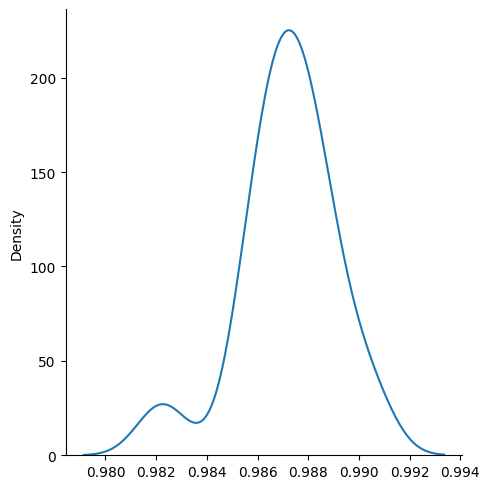

In [35]:
sns.displot(resultados_arvore, kind = 'kde'); # Árvore de Decisão.

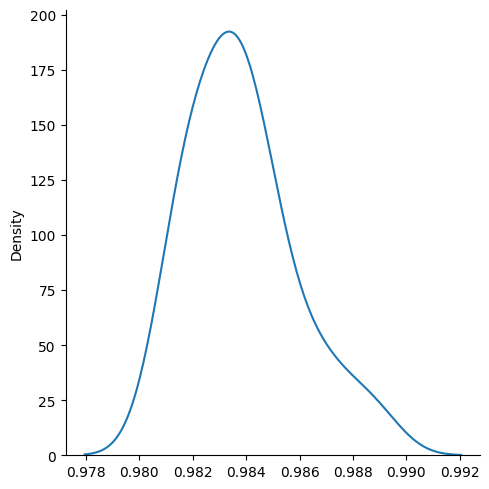

In [32]:
sns.displot(resultados_random_forest, kind = 'kde'); # Random Forest.

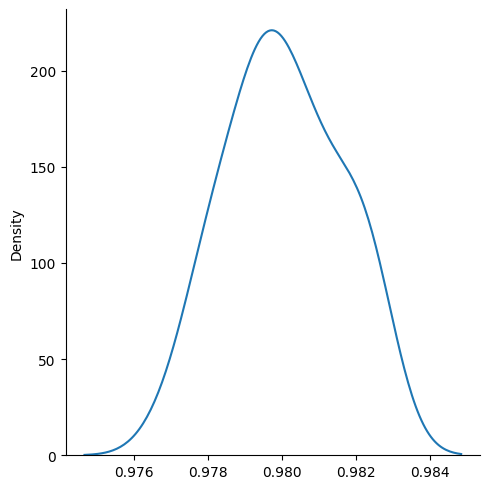

In [36]:
sns.displot(resultados_knn, kind = 'kde'); # k-NN.

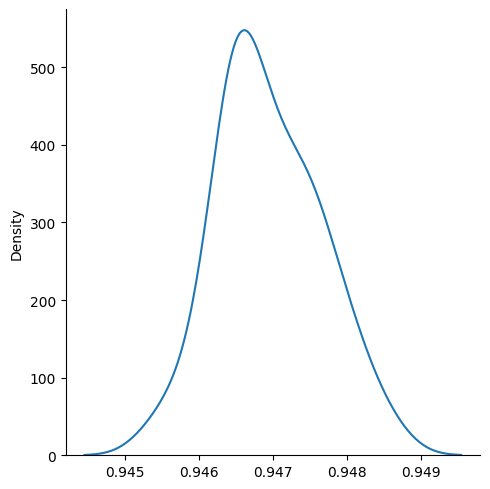

In [37]:
sns.displot(resultados_logistica, kind = 'kde'); # Regresão Logística.

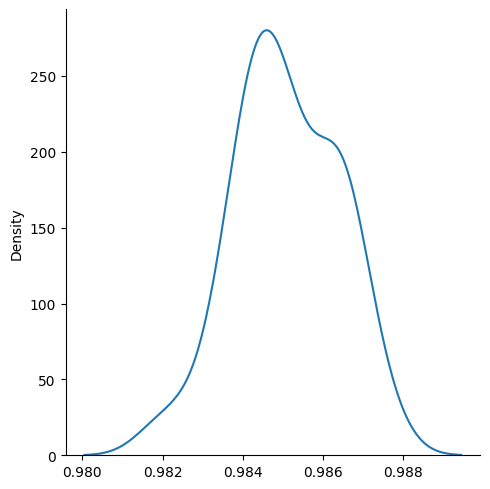

In [38]:
sns.displot(resultados_svm, kind = 'kde'); # SVM.

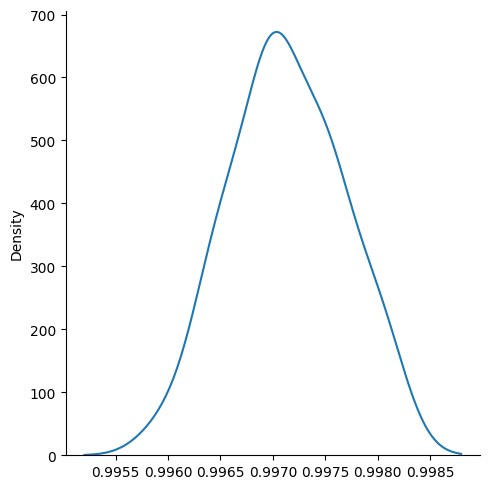

In [39]:
sns.displot(resultados_rede_neural, kind = 'kde'); # Multi-layer Perceptron/ Redes Neurais.

# **Teste de hipótese com ANOVA e Tukey**

O teste de hipótese ANOVA (Análise de Variância) é um procedimento estatístico usado para comparar as médias de três ou mais grupos independentes. Ele avalia se as médias dos grupos são estatisticamente diferentes ou se podem ser consideradas iguais.

O teste de hipótese ANOVA é realizado em etapas, sendo a primeira etapa a formulação das hipóteses nula (H0) e alternativa (H1). A hipótese nula afirma que não há diferença significativa entre as médias dos grupos, enquanto a hipótese alternativa afirma que pelo menos uma das médias é significativamente diferente das outras.

A análise de ANOVA gera uma estatística de teste chamada valor F. Esse valor é comparado a uma distribuição F para determinar se há evidências suficientes para rejeitar a hipótese nula. Se o valor F for significativo, isso indica que pelo menos um grupo tem uma média significativamente diferente dos outros grupos.

Se a ANOVA resultar em um valor F significativo, um teste de comparações múltiplas, como o teste de Tukey, pode ser realizado para identificar quais grupos diferem significativamente entre si. O teste de Tukey compara todas as combinações possíveis de médias de grupos e determina quais são estatisticamente diferentes.

Ire calcular o valor-p (p-value) do teste de hipótese ANOVA entre os resultados dos diferentes algoritmos utilizando a função f_oneway() da biblioteca scipy.stats. O valor-p é uma medida estatística que indica a probabilidade de obter os resultados observados ou resultados ainda mais extremos, assumindo que a hipótese nula seja verdadeira. Se o valor-p for menor que um nível de significância pré-determinado (por exemplo, 0.05), pode-se rejeitar a hipótese nula e concluir que há diferenças significativas entre as médias dos grupos. Caso contrário, se o valor-p for maior que o nível de significância, não há evidências suficientes para rejeitar a hipótese nula e podemos considerar que as médias dos grupos são estatisticamente iguais.

In [40]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn,\
                resultados_logistica, resultados_svm, resultados_rede_neural)
print("Valor-p:", p)

Valor-p: 1.9262610665652383e-180


Realizarei um teste de hipótese com base no valor-p (p-value) calculado a partir do teste de ANOVA.

Definirei um nível de significância de 0.05 (alpha). Se o valor-p calculado for menor ou igual a esse nível de significância, a hipótese nula é rejeitada, o que indica que há diferenças estatisticamente significativas entre as médias dos grupos. Por outro lado, se o valor-p for maior que o nível de significância, não há evidências suficientes para rejeitar a hipótese nula, o que sugere que os grupos têm médias semelhantes.

In [41]:
# Ao executar esse código, será impressa a mensagem apropriada com base no resultado do teste de hipótese.
alpha = 0.05

if p <= alpha:
    print('Hipótese nula rejeitada. Os dados são estatisticamente diferentes entre os grupos.')
else:
    print('Hipótese nula não rejeitada. Não há evidência suficiente para afirmar que os grupos têm médias diferentes.')

Hipótese nula rejeitada. Os dados são estatisticamente diferentes entre os grupos.


Criarei um dicionário com objetivo de criar uma estrutura de dados que associa cada resultado de acurácia aos respectivos algoritmos. Isso pode ser útil para realizar análises subsequentes ou para visualizar os resultados de forma organizada.

In [42]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

O seguinte código cria um DataFrame chamado resultados_df a partir do dicionário resultados_algoritmos. O DataFrame terá duas colunas: "accuracy" e "algoritmo".

In [43]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9970,rede_neural
176,0.9970,rede_neural
177,0.9975,rede_neural
178,0.9975,rede_neural


Criarei um objeto chamado "compara_algoritmos" da classe MultiComparison utilizando os dados do DataFrame "resultados_df" que será utilizado posteriormente para realizar análises estatísticas, como testes de comparação de médias entre os diferentes grupos ou ajustes de valores-p para levar em conta a realização de múltiplos testes.

In [46]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

Realizarei o teste de Tukey (tukeyhsd()) usando o objeto compara_algoritmos da classe MultiComparison. O teste de Tukey é um procedimento estatístico utilizado para comparar todas as combinações possíveis de médias entre os grupos.

In [47]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071    0.0 -0.0082 -0.0061   True
       arvore     logistica  -0.0402    0.0 -0.0413 -0.0392   True
       arvore random_forest  -0.0034    0.0 -0.0044 -0.0023   True
       arvore   rede_neural     0.01    0.0  0.0089   0.011   True
       arvore           svm  -0.0021    0.0 -0.0032  -0.001   True
          knn     logistica  -0.0331    0.0 -0.0342  -0.032   True
          knn random_forest   0.0038    0.0  0.0027  0.0048   True
          knn   rede_neural   0.0171    0.0   0.016  0.0181   True
          knn           svm    0.005    0.0   0.004  0.0061   True
    logistica random_forest   0.0369    0.0  0.0358  0.0379   True
    logistica   rede_neural   0.0502    0.0  0.0491  0.0512   True
    logistica           svm   0.0381    0.0  0.0371  0.0392   

Os resultados do teste de Tukey são apresentados na tabela. Cada linha representa uma comparação entre dois grupos. Os principais campos são os seguintes:

group1 e group2: Os grupos comparados.

meandiff: A diferença média entre os grupos.

p-adj: O valor-p ajustado para controle da taxa de erro familiar (FWER).

lower e upper: Os limites inferior e superior do intervalo de confiança para a diferença média.

reject: Indica se a hipótese nula de igualdade das médias é rejeitada ou não. "True" indica que a diferença é estatisticamente significativa.

Com base nos resultados apresentados, podemos observar que existem diferenças estatisticamente significativas entre vários pares de grupos. Por exemplo:

O grupo "arvore" tem médias significativamente menores do que os grupos "knn", "logistica", "random_forest", "rede_neural" e "svm".
O grupo "knn" tem médias significativamente menores do que os grupos "logistica", "random_forest", "rede_neural" e "svm".

O grupo "logistica" tem médias significativamente maiores do que os grupos "random_forest", "rede_neural" e "svm".
Entre outros pares de grupos.

In [48]:
# Retorna a média de cada coluna do DataFrame resultados.
# Cada coluna representa um algoritmo e sua respectiva média de acurácia.
resultados.mean()

Arvore           0.987183
Random forest    0.983817
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997133
dtype: float64

O seguinte código "teste_estatistico.plot_simultaneous()" será usado para plotar um gráfico simultâneo de comparação de médias. O objeto teste_estatistico é o resultado do teste de Tukey realizado anteriormente, será o método plot_simultaneous() é chamado para gerar o gráfico.

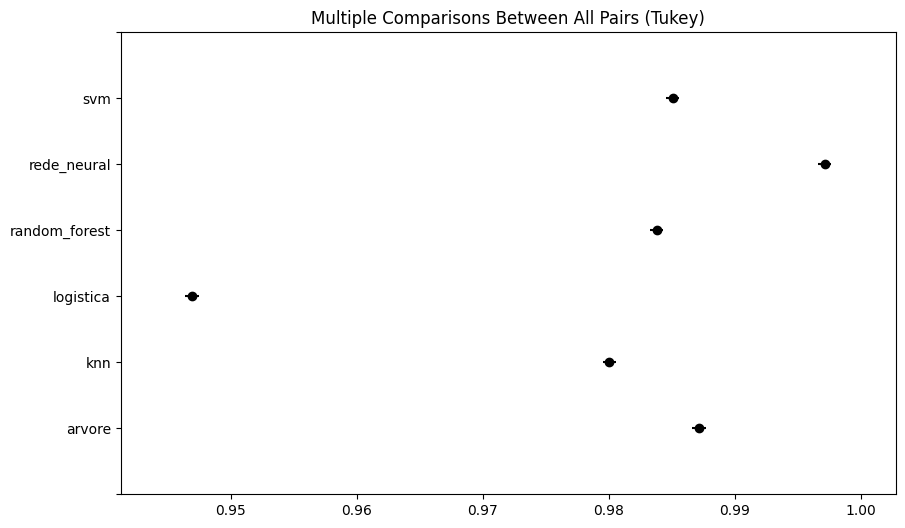

In [50]:
teste_estatistico.plot_simultaneous();

Agora que identifiquei os melhores algoritmos para a base de crédito, posso prosseguir com maior confiança na escolha dos modelos mais eficazes. Após análise cuidadosa dos resultados, selecionei os três algoritmos que apresentaram o melhor desempenho: SVM, Árvore de Decisão e Redes Neurais. Vou salvar os modelos correspondentes a esses algoritmos, que demonstraram ser os mais promissores para resolver os desafios da base de crédito.

# **Considerações Finais**

Neste estudo de caso, tive a oportunidade de aprender e aplicar métodos de avaliação de algoritmos para selecionar o melhor modelo. Ao explorar diferentes algoritmos e analisar seus desempenhos, adquiri conhecimentos valiosos sobre o processo de escolha do modelo mais adequado para um determinado problema. Essa experiência fortaleceu minha compreensão das técnicas de avaliação e me capacitou a tomar decisões mais informadas ao lidar com desafios futuros.

Agradeço ao professor Jones Granatyr pelo conhecimento compartilhado e pela orientação durante o curso. Essa experiência contribuiu significativamente para minha compreensão de algoritmos de Machine Learning e sua aplicação prática.